# Setup & Imports

In [59]:
# ------------------ Data Manipulation ------------------
import pandas as pd          # DataFrame operations
import numpy as np           # Numerical computations

# ------------------ Visualization ------------------
import matplotlib.pyplot as plt  # Basic plotting
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting support
import seaborn as sns             # Statistical visualization

# ------------------ Statistics & Analysis ------------------
from scipy.stats import pearsonr    # Pearson correlation
import scipy.stats as stats         # General statistical tools
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

# ------------------ Machine Learning & Scaling ------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Normalization and standardization
from sklearn.cluster import KMeans                              # KMeans clustering
from sklearn.preprocessing import PolynomialFeatures            # Polynomial basis for regression
from sklearn.linear_model import LinearRegression               # Linear regression model
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import joblib
import warnings
import json
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# ------------------ Optimization & Pareto Analysis ------------------
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting  # Pareto front identification

# ------------------ Geospatial Analysis ------------------
import geopandas as gpd         # Handling shapefiles and spatial data
import fiona                    # I/O support for geospatial formats
import pyogrio                  # Fast I/O for vector geodata
import rasterio                 # Raster data reading/writing
from rasterstats import zonal_stats  # Zonal statistics from rasters

# ------------------ Utility & System ------------------
import os                # File system interaction
import warnings          # Suppress warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

# ------------------ Pandas Display Settings ------------------
pd.options.display.float_format = '{:.2f}'.format         # Format float output
pd.set_option('display.max_columns', None)                # Show all columns

# ------------------ Matplotlib Settings ------------------
plt.rcParams['font.sans-serif'] = ['SimHei']              # Support Chinese characters
plt.rcParams['axes.unicode_minus'] = False                # Display minus signs correctly

# Inline plot display (only needed in notebooks)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import joblib
import json

from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Data & model imports

In [49]:
df = pd.read_csv('../data/grid500_36cities_with_eff_k500.csv')
grid500 = df.copy()
print(grid500.shape)
grid500.head()

(194941, 52)


,Global_ID,City,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightVariety,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,baseAreaTotal,totalArea,areaVariance,buildingIntensity,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,balanceIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label,log_NTL2023_focal,log_VIT202311,Efficiency_RBF,Efficiency_Poly
0,0,Beijing,6.18,7.03,1649.86,0.00,31,93.00,3.00,3.00,3.00,0.00,0.03,0.00,0.00,180,6500.98,209.71,831.63,32.55,5.07,0.56,88704.58,88704.58,50961857.70,0.35,2861.44,132998.25,0.47,0.01,0.80,234.60,0.35,0.35,0.84,0.89,4.00,0.00,0.20,5,1,5.81,52.56,14.99,620.94,268.09,2565.57,5.00,2.08,7.41,0.62,1.00
1,1,Beijing,5.74,7.23,155.86,0.00,29,87.00,3.00,3.00,3.00,0.00,0.03,0.00,0.00,149,3810.39,131.39,272.14,15.33,5.17,0.62,33119.49,33119.49,1261729.88,0.13,1142.05,196625.22,0.67,0.26,0.89,35.66,0.13,0.13,0.86,0.94,12.00,0.64,0.20,7,1,5.14,34.22,6.82,594.16,300.09,2010.84,5.00,2.11,5.06,0.58,0.95
2,2,Beijing,11.32,13.62,57.14,0.00,22,66.00,3.00,3.00,3.00,0.00,0.05,0.00,0.00,117,3645.40,165.70,668.26,28.73,4.92,0.56,51092.86,51092.86,30358745.83,0.20,2322.40,132197.31,0.53,0.01,0.90,151.50,0.20,0.20,0.88,0.93,0.00,0.00,0.20,1,0,5.32,47.90,17.34,610.84,283.84,2044.73,5.00,2.68,4.06,0.75,0.93
3,3,Beijing,11.73,14.36,243.57,0.00,8,24.00,3.00,3.00,3.00,0.00,0.12,0.00,0.00,42,1147.60,143.45,283.01,75.66,5.70,0.60,8534.61,8534.61,958399.89,0.03,1066.83,205685.37,0.82,0.02,0.95,15.54,0.03,0.03,0.93,0.98,0.00,0.00,0.20,3,1,5.25,35.93,13.49,474.17,232.31,1896.14,5.00,2.73,5.50,0.67,0.96
4,4,Beijing,8.45,9.19,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.15,0.00,0.00,0.98,0.00,0.00,0.00,0.82,0.98,16.00,0.69,0.00,1,1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.32,0.00,0.54,0.49


In [50]:
features = [
    'buildingCount', 'totalHeight', 'avgHeight', 'basePerimeterTotal',
    'basePerimeterAvg', 'compactness', 'baseAreaTotal', 'totalArea',
    'buildingIntensity', 'avgBuildingArea', 'FAR', 'coverageRatio',
    'roadDensity', 'intersectionDensity', 'poiDensity', 'poiDiversity',
    'FVC', 'permeableRatio', 'maxHeight', 'minHeight', 'heightRange', 'heightIndex',
    'heightDensity', 'heightVariety', 'cornerCountTotal', 'basePerimeterMax',
    'basePerimeterMin', 'shapeComplexity', 'areaVariance', 'parcelArea',
    'largestPatchIndex', 'shape3DIndex', 'balanceIndex', 'cornerCountAvg',
    'buildingProximity', 'buildingMinDist', 'buildingMaxDist',
    'buildingDistAvg', 'buildingDistVar', 'SVF', 'streetRatio'
]

targets = ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv']

In [61]:
# Define model folder
model_dir = "../output/models"

# Dictionary to store loaded models
models = {}

# Loop through each target, load the model and store in dict
for target in targets:
    model_path = os.path.join(model_dir, f"{target}_xgb_model.pkl")
    if os.path.exists(model_path):
        models[target] = joblib.load(model_path)
        print(f"✔ Loaded model for {target}")
    else:
        print(f"⚠ Model file not found: {model_path}")

✔ Loaded model for log_NTL2023_focal
✔ Loaded model for log_VIT202311
✔ Loaded model for UHIDAY2020_07_inv


In [62]:
def predict_target(target_name, X_input):
    model = models.get(target_name)
    if model is not None:
        return model.predict(X_input)
    else:
        raise ValueError(f"No model loaded for target: {target_name}")

# Extract ideal ranges of urban form indicators

In [3]:
grid500.describe()

,Global_ID,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightVariety,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,baseAreaTotal,totalArea,areaVariance,buildingIntensity,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,balanceIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label,log_NTL2023_focal,log_VIT202311,Efficiency_RBF,Efficiency_Poly
count,194941.00,189742.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194352.00,194941.00,194941.00,194941.00,194941.00
mean,98137.51,28.88,28.65,1414.14,-0.99,46.70,893.91,16.53,30.42,9.58,20.83,0.10,0.00,0.30,315.42,4959.32,112.06,347.82,22.65,4.55,0.54,33192.68,216494.27,191423545.70,0.87,5437.01,180006.93,0.50,185.28,0.86,255.17,0.87,0.13,0.62,0.88,195.28,1.08,0.77,4.60,5.59,6.16,40.04,15.03,499.16,203.23,2063.94,5.26,3.20,6.22,0.68,0.95
std,56862.94,19.36,17.87,1821.23,1.00,50.96,1035.48,8.72,24.26,4.91,23.99,0.17,0.00,0.28,352.35,4245.40,60.43,230.34,35.73,1.40,0.17,27474.13,210010.02,2300870309.71,0.84,7776.02,80149.49,0.29,50203.04,0.11,311.22,0.84,0.11,0.19,0.10,382.88,0.81,0.57,6.46,12.92,2.70,36.33,31.56,212.18,87.42,1591.36,1.77,0.64,1.90,0.16,0.08
min,0.00,0.00,0.00,0.00,-4.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49033.00,15.06,15.64,206.86,-1.69,12.00,144.00,12.00,12.00,6.00,0.00,0.02,0.00,0.00,72.00,1417.38,83.02,202.45,4.35,4.57,0.53,8888.17,37241.51,3519241.57,0.15,1875.57,131267.14,0.29,0.00,0.79,52.87,0.15,0.04,0.51,0.81,4.00,0.00,0.40,1.00,0.00,5.26,26.51,5.37,459.16,177.27,1230.33,5.00,2.81,5.34,0.57,0.96
50%,97800.00,25.85,26.01,731.14,-0.91,35.00,559.00,16.67,27.00,12.00,15.00,0.04,0.00,0.28,222.00,4200.02,110.75,319.04,14.07,4.82,0.57,29057.71,157756.72,20726892.83,0.63,4027.77,222107.39,0.48,0.01,0.88,178.28,0.63,0.12,0.62,0.90,40.00,1.26,0.70,3.00,2.00,5.92,34.90,8.95,586.78,236.19,1926.76,5.00,3.30,6.60,0.69,0.97
75%,147135.00,38.67,38.17,2003.43,0.00,65.00,1315.00,21.99,40.00,12.00,28.00,0.09,0.01,0.43,445.00,7512.92,137.30,461.66,28.38,5.08,0.62,51784.69,347326.83,74777609.98,1.39,6726.97,238506.86,0.71,0.04,0.95,347.80,1.39,0.21,0.74,0.96,212.00,1.82,1.05,6.00,6.00,7.02,45.61,14.67,645.52,263.21,2637.05,7.00,3.67,7.60,0.79,0.98
max,196769.00,465.96,348.37,68494.71,5.13,1189.00,22354.50,130.50,535.00,112.00,532.00,1.00,0.09,2.87,8619.00,50912.47,1689.25,5146.21,1689.25,39.49,0.99,226640.62,3672930.95,662000000000.00,14.69,664544.83,250000.00,1.00,21048158.03,1.00,12613.17,14.69,0.91,1.00,1.00,10124.00,2.48,19.56,376.00,2254.00,99.47,687.04,687.04,706.01,358.32,21993.84,7.00,5.86,11.13,1.00,1.00


## By urban form

In [5]:
# Ensure the relevant columns exist
efficiency_cols = [col for col in grid500.columns if col.startswith("Efficiency_RBF")]
if not efficiency_cols:
    raise ValueError("No efficiency columns found in the dataset.")

In [32]:
# Choose a reference efficiency column (e.g., for k=500)
eff_col = "Efficiency_RBF"
if eff_col not in grid500.columns:
    raise ValueError(f"Column '{eff_col}' not found in the dataset.")

# Container for results
top10_ranges_cluster = {}

# Loop through each cluster
for cluster_id in sorted(grid500['cluster_label'].unique()):
    # Filter data for the current cluster
    cluster_data = grid500[grid500['cluster_label'] == cluster_id]
    
    # Determine top 10% efficient units
    threshold = cluster_data[eff_col].quantile(0.9)
    top10 = cluster_data[cluster_data[eff_col] >= threshold]

    # Compute seven-number summary
    feature_stats = top10[features].describe(percentiles=[0.10, 0.25, 0.5, 0.75, 0.90]).T
    feature_stats = feature_stats[['min', '10%', '25%', '50%', '75%', '90%', 'max']]
    feature_stats.columns = ['min', '10%', '25%', '50%', '75%', '90%', 'max']

    # Store result
    top10_ranges_cluster[f'Cluster_{cluster_id}'] = feature_stats

# Combine all cluster results into a multi-index DataFrame for display
df_top10_ranges = pd.concat(top10_ranges_cluster, names=['Cluster', 'Feature'])
df_top10_ranges.to_csv("../output/top10_range_by_urban_form.csv")

## By city scale

In [33]:
# === Define city-scale mapping ===
city_to_category = {
    'Beijing': 'SuperLarge', 'Tianjin': 'SuperLarge', 'Shanghai': 'SuperLarge',
    'Guangzhou': 'SuperLarge', 'Shenzhen': 'SuperLarge', 'Chongqing': 'SuperLarge', 'Chengdu': 'SuperLarge',
    'Shenyang': 'VeryLarge', 'Harbin': 'VeryLarge', 'Nanjing': 'VeryLarge', 'Hangzhou': 'VeryLarge',
    'Jinan': 'VeryLarge', 'Zhengzhou': 'VeryLarge', 'Wuhan': 'VeryLarge', 'Changsha': 'VeryLarge',
    'Kunming': 'VeryLarge', 'Xian': 'VeryLarge', 'Dalian': 'VeryLarge', 'Qingdao': 'VeryLarge',
    'Shijiazhuang': 'LargeI', 'Taiyuan': 'LargeI', 'Changchun': 'LargeI', 'Hefei': 'LargeI',
    'Fuzhou': 'LargeI', 'Nanchang': 'LargeI', 'Nanning': 'LargeI', 'Guiyang': 'LargeI',
    'Urumqi': 'LargeI', 'Ningbo': 'LargeI', 'Xiamen': 'LargeI',
    'Hohhot': 'LargeII', 'Haikou': 'LargeII', 'Lanzhou': 'LargeII',
    'Xining': 'LargeII', 'Yinchuan': 'LargeII', 'Lasa': 'Medium'
}

# === Map city scale to DataFrame ===
grid500["city_scale"] = grid500["City"].map(city_to_category)

# Check for unmapped cities
if grid500["city_scale"].isnull().any():
    missing_cities = grid500.loc[grid500["city_scale"].isnull(), "City"].unique()
    print(f"⚠️ Warning: Some cities were not mapped to a scale category: {missing_cities.tolist()}")

In [34]:
grid500.head()

,Global_ID,City,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightVariety,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,baseAreaTotal,totalArea,areaVariance,buildingIntensity,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,balanceIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label,log_NTL2023_focal,log_VIT202311,Efficiency_RBF,Efficiency_Poly,city_scale,climate_zone
0,0,Beijing,6.18,7.03,1649.86,0.00,31,93.00,3.00,3.00,3.00,0.00,0.03,0.00,0.00,180,6500.98,209.71,831.63,32.55,5.07,0.56,88704.58,88704.58,50961857.70,0.35,2861.44,132998.25,0.47,0.01,0.80,234.60,0.35,0.35,0.84,0.89,4.00,0.00,0.20,5,1,5.81,52.56,14.99,620.94,268.09,2565.57,5.00,2.08,7.41,0.62,1.00,SuperLarge,NorthChina
1,1,Beijing,5.74,7.23,155.86,0.00,29,87.00,3.00,3.00,3.00,0.00,0.03,0.00,0.00,149,3810.39,131.39,272.14,15.33,5.17,0.62,33119.49,33119.49,1261729.88,0.13,1142.05,196625.22,0.67,0.26,0.89,35.66,0.13,0.13,0.86,0.94,12.00,0.64,0.20,7,1,5.14,34.22,6.82,594.16,300.09,2010.84,5.00,2.11,5.06,0.58,0.95,SuperLarge,NorthChina
2,2,Beijing,11.32,13.62,57.14,0.00,22,66.00,3.00,3.00,3.00,0.00,0.05,0.00,0.00,117,3645.40,165.70,668.26,28.73,4.92,0.56,51092.86,51092.86,30358745.83,0.20,2322.40,132197.31,0.53,0.01,0.90,151.50,0.20,0.20,0.88,0.93,0.00,0.00,0.20,1,0,5.32,47.90,17.34,610.84,283.84,2044.73,5.00,2.68,4.06,0.75,0.93,SuperLarge,NorthChina
3,3,Beijing,11.73,14.36,243.57,0.00,8,24.00,3.00,3.00,3.00,0.00,0.12,0.00,0.00,42,1147.60,143.45,283.01,75.66,5.70,0.60,8534.61,8534.61,958399.89,0.03,1066.83,205685.37,0.82,0.02,0.95,15.54,0.03,0.03,0.93,0.98,0.00,0.00,0.20,3,1,5.25,35.93,13.49,474.17,232.31,1896.14,5.00,2.73,5.50,0.67,0.96,SuperLarge,NorthChina
4,4,Beijing,8.45,9.19,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.15,0.00,0.00,0.98,0.00,0.00,0.00,0.82,0.98,16.00,0.69,0.00,1,1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.32,0.00,0.54,0.49,SuperLarge,NorthChina


In [35]:
# === Set efficiency column and feature list ===
eff_col = "Efficiency_RBF"
if eff_col not in grid500.columns:
    raise ValueError(f"Column '{eff_col}' not found in the dataset.")

# Define the list of features you want to evaluate
# Example: features = ['FVC', 'SVF', 'compactness', ...]
# Ensure this list exists before running the next step

# === Compute min-max range of top 10% efficient units per city scale ===
top10_ranges_scale = {}

for scale in sorted(grid500["city_scale"].dropna().unique()):
    subset = grid500[grid500["city_scale"] == scale]
    # Select top 10% by efficiency
    threshold = subset[eff_col].quantile(0.9)
    top10 = subset[subset[eff_col] >= threshold]

    # Compute seven-number summary
    feature_stats = top10[features].describe(percentiles=[0.10, 0.25, 0.5, 0.75, 0.90]).T
    feature_stats = feature_stats[['min', '10%', '25%', '50%', '75%', '90%', 'max']]
    feature_stats.columns = ['min', '10%', '25%', '50%', '75%', '90%', 'max']

    top10_ranges_scale[scale] = feature_stats

# === Combine results into one DataFrame ===
df_top10_ranges_by_scale = pd.concat(top10_ranges_scale, names=['CityScale', 'Feature'])

# === Save to CSV ===
output_path = "../output/top10_range_by_city_scale.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_top10_ranges_by_scale.to_csv(output_path)

print(f"✅ Top 10% efficiency feature ranges saved to: {output_path}")

✅ Top 10% efficiency feature ranges saved to: ../output/top10_range_by_city_scale.csv


## By climate zone

In [36]:
import pandas as pd
import os

# === Define city-to-climate mapping ===
city_to_climate = {
    # North China
    'Beijing': 'NorthChina', 'Tianjin': 'NorthChina', 'Shijiazhuang': 'NorthChina',
    'Taiyuan': 'NorthChina', 'Hohhot': 'NorthChina',
    
    # Northeast China
    'Shenyang': 'Northeast', 'Changchun': 'Northeast',
    'Harbin': 'Northeast', 'Dalian': 'Northeast',
    
    # East China
    'Shanghai': 'EastChina', 'Nanjing': 'EastChina', 'Hangzhou': 'EastChina',
    'Hefei': 'EastChina', 'Jinan': 'EastChina', 'Fuzhou': 'EastChina',
    'Xiamen': 'EastChina', 'Ningbo': 'EastChina', 'Qingdao': 'EastChina',
    
    # Central China
    'Zhengzhou': 'CentralChina', 'Wuhan': 'CentralChina',
    'Changsha': 'CentralChina', 'Nanchang': 'CentralChina',
    
    # South China
    'Guangzhou': 'SouthChina', 'Shenzhen': 'SouthChina',
    'Haikou': 'SouthChina', 'Nanning': 'SouthChina',
    
    # Southwest China
    'Chongqing': 'SouthwestChina', 'Chengdu': 'SouthwestChina',
    'Guiyang': 'SouthwestChina', 'Kunming': 'SouthwestChina', 'Lasa': 'SouthwestChina',
    
    # Northwest China
    'Xian': 'NorthwestChina', 'Lanzhou': 'NorthwestChina',
    'Xining': 'NorthwestChina', 'Yinchuan': 'NorthwestChina', 'Urumqi': 'NorthwestChina',
}

# === Add climate region to the DataFrame ===
grid500["climate_zone"] = grid500["City"].map(city_to_climate)

# Check for unmapped cities
if grid500["climate_zone"].isnull().any():
    missing_cities = grid500.loc[grid500["climate_zone"].isnull(), "City"].unique()
    print(f"⚠️ Warning: Some cities are missing climate classification: {missing_cities.tolist()}")

# === Set efficiency column and feature list ===
eff_col = "Efficiency_RBF"
if eff_col not in grid500.columns:
    raise ValueError(f"Column '{eff_col}' not found in the dataset.")

# === Loop through each climate zone and compute top 10% efficient feature ranges ===
top10_ranges_climate = {}

for climate in sorted(grid500["climate_zone"].dropna().unique()):
    subset = grid500[grid500["climate_zone"] == climate]

   # Filter top 10% based on efficiency
    threshold = subset[eff_col].quantile(0.9)
    top10 = subset[subset[eff_col] >= threshold]

    # Compute seven-number summary
    feature_stats = top10[features].describe(percentiles=[0.10, 0.25, 0.5, 0.75, 0.90]).T
    feature_stats = feature_stats[['min', '10%', '25%', '50%', '75%', '90%', 'max']]
    feature_stats.columns = ['min', '10%', '25%', '50%', '75%', '90%', 'max']

    # Store result
    top10_ranges_climate[climate] = feature_stats

# === Combine into a multi-index DataFrame for export ===
df_top10_ranges_by_climate = pd.concat(top10_ranges_climate, names=['ClimateZone', 'Feature'])

# === Save result ===
output_path = "../output/top10_range_by_climate_zone.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_top10_ranges_by_climate.to_csv(output_path)

print(f"✅ Top 10% efficiency feature ranges saved to: {output_path}")

✅ Top 10% efficiency feature ranges saved to: ../output/top10_range_by_climate_zone.csv


## By each city

In [37]:
# === Container for city-based results ===
top10_ranges_city = {}

# === Loop through each city ===
for city in sorted(grid500["City"].dropna().unique()):
    city_data = grid500[grid500["City"] == city]

    # Skip if not enough samples
    if len(city_data) < 10:
        print(f"⚠️ Skipping {city} due to insufficient data (<10 rows)")
        continue

    # Filter top 10% by efficiency
    threshold = city_data[eff_col].quantile(0.9)
    top10 = city_data[city_data[eff_col] >= threshold]

    # Compute seven-number summary
    feature_stats = top10[features].describe(percentiles=[0.10, 0.25, 0.5, 0.75, 0.90]).T
    feature_stats = feature_stats[['min', '10%', '25%', '50%', '75%', '90%', 'max']]
    feature_stats.columns = ['min', '10%', '25%', '50%', '75%', '90%', 'max']

    # Store result
    top10_ranges_city[city] = feature_stats

# === Combine into one DataFrame with MultiIndex ===
df_top10_ranges_by_city = pd.concat(top10_ranges_city, names=['City', 'Feature'])

# === Save to CSV ===
output_path = "../output/top10_range_by_city.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_top10_ranges_by_city.to_csv(output_path)

print(f"✅ Top 10% efficiency feature ranges saved to: {output_path}")

✅ Top 10% efficiency feature ranges saved to: ../output/top10_range_by_city.csv


# Optimization for higher performance indices

## Set threshold

In [81]:
grid500[targets].describe()

,log_NTL2023_focal,log_VIT202311,UHIDAY2020_07_inv
count,194941.00,194941.00,194941.00
mean,3.20,6.22,-0.99
std,0.64,1.90,1.00
min,0.00,0.00,-4.60
25%,2.81,5.34,-1.69
50%,3.30,6.60,-0.91
75%,3.67,7.60,0.00
max,5.86,11.13,5.13


In [43]:
# Select blocks
block_selected = grid500[grid500['Global_ID'] == 64672].iloc[0]
block_selected[targets]

log_NTL2023_focal    3.73
log_VIT202311        5.79
UHIDAY2020_07_inv   -3.16
Name: 64343, dtype: object

In [89]:
# Set thresholds
thresholds = {
    "economic": 4,
    "social": 6,
    "environment": 2
}

In [56]:
block_selected[features]

buildingCount                   85
totalHeight                2391.50
avgHeight                    28.14
basePerimeterTotal         8899.73
basePerimeterAvg            104.70
compactness                   0.59
baseAreaTotal             51932.45
totalArea                490180.93
buildingIntensity             1.96
avgBuildingArea            5766.83
FAR                           1.96
coverageRatio                 0.21
roadDensity                      4
intersectionDensity              2
poiDensity                  380.00
poiDiversity                  2.08
FVC                           0.55
permeableRatio                0.68
maxHeight                    64.00
minHeight                    12.00
heightRange                  52.00
heightIndex                   0.03
heightDensity                 0.01
heightVariety                 0.75
cornerCountTotal               579
basePerimeterMax            558.30
basePerimeterMin              1.05
shapeComplexity               4.80
areaVariance        

In [57]:
x0 = block_selected[features].values.astype(float)
x0_orig = x0.copy()

## Lagrangian Penalty Method

In [84]:
rho_value = 10000

{'economic': 4, 'social': 6, 'environment': 2}
Optimization terminated successfully.
         Current function value: 12292433467.173120
         Iterations: 2
         Function evaluations: 196

✅ 优化完成（多变量 + 惩罚式拉格朗日）
baseAreaTotal: 51932.454 → 51932.454
totalArea: 490180.929 → 490180.929
FAR: 1.961 → 1.961
intersectionDensity: 2.000 → 16.000
SVF: 0.735 → 0.851

💰 总成本估算：¥12,292,433,467

🌟 优化后代理模型预测绩效：
经济绩效:      3.634
社会绩效:      7.919
环境绩效:      -1.487


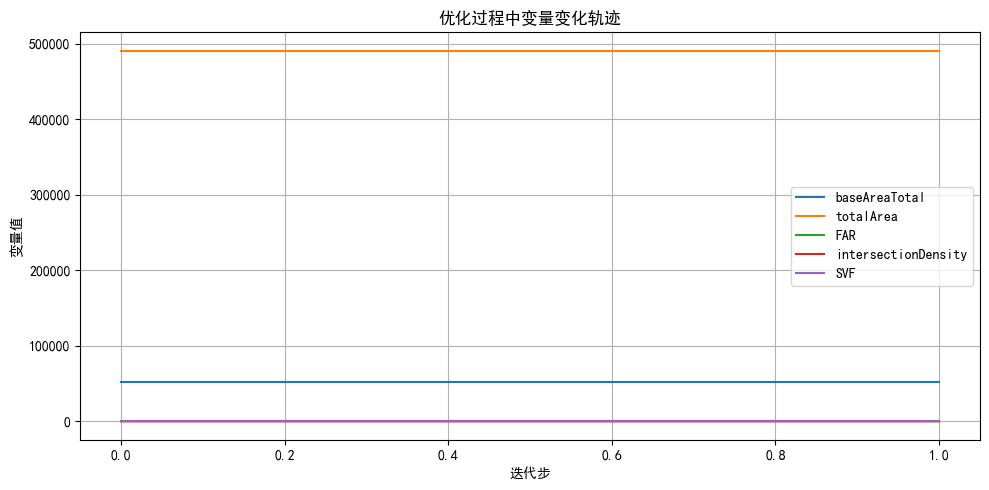

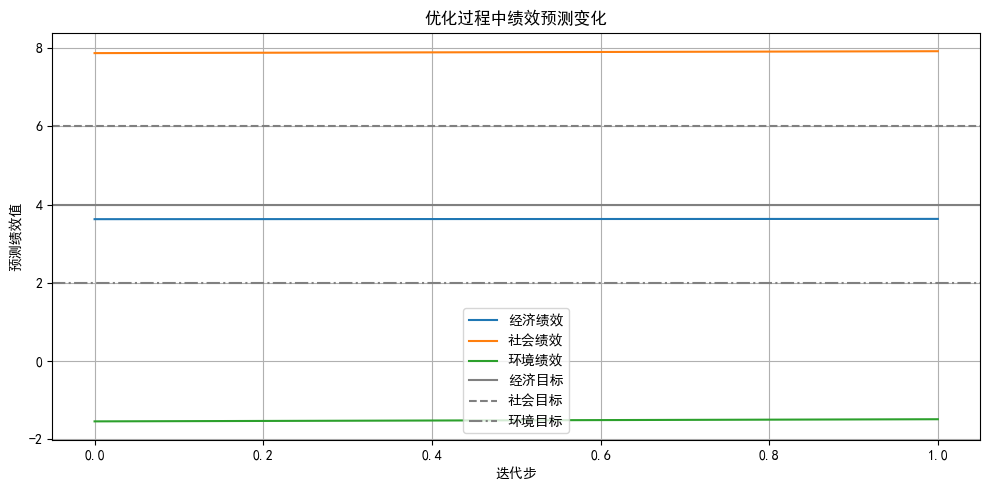

In [94]:
# ========== 0. 初始化记录历史轨迹 ==========
history = []

def callbackF(xk):
    # xk 是优化器当前步的解（子变量）
    x_full = x0.copy()
    for i, idx in enumerate(opt_indices):
        x_full[idx] = xk[i]

    econ = models['log_NTL2023_focal'].predict([x_full])[0]
    soc = models['log_VIT202311'].predict([x_full])[0]
    env = models['UHIDAY2020_07_inv'].predict([x_full])[0]
    cost = sum([
        cost_weights[opt_vars[i]] * (xk[i] - x0_orig[features.index(opt_vars[i])])**2
        for i in range(len(opt_vars))
    ])

    # 存储当前步所有信息
    step = {var: xk[i] for i, var in enumerate(opt_vars)}
    step.update({"econ": econ, "soc": soc, "env": env, "cost": cost})
    history.append(step)

# ========== 4. 优化变量及其成本权重 ==========
opt_vars = ['baseAreaTotal', 'totalArea', 'FAR', 'intersectionDensity', 'SVF']
cost_weights = {
    'baseAreaTotal': 500,
    'totalArea': 10,
    'FAR': 20000,
    'intersectionDensity': 700,
    'SVF': 60000
}

print(thresholds)

# ========== 5. 提取初始城市形态数据（x0） ==========
x0 = block_selected[features].values.astype(float)
x0_orig = x0.copy()

# 获取优化变量的索引
opt_indices = [features.index(var) for var in opt_vars]
x0_sub = x0[opt_indices]

# ========== 6. 构造惩罚式目标函数 ==========
def lagrangian_penalty(x_sub, rho=1e9):
    x_full = x0.copy()
    for i, idx in enumerate(opt_indices):
        x_full[idx] = x_sub[i]

    cost = 0
    for i, var in enumerate(opt_vars):
        delta = x_sub[i] - x0_orig[features.index(var)]
        c = cost_weights[var] * delta**2
        # print(f"{var} Δ: {delta:.4f} → 成本: ¥{c:,.0f}")
        cost += c

    econ = models['log_NTL2023_focal'].predict([x_full])[0]
    soc = models['log_VIT202311'].predict([x_full])[0]
    env = models['UHIDAY2020_07_inv'].predict([x_full])[0]

    econ_gap = max(0, thresholds['economic'] - econ)
    soc_gap  = max(0, thresholds['social'] - soc)
    env_gap  = max(0, thresholds['environment'] - env)

    penalty = rho * (econ_gap**2 + soc_gap**2 + env_gap**2)

    # print(f"模型预测 → Econ: {econ:.3f}, Social: {soc:.3f}, Env: {env:.3f} | 惩罚: ¥{penalty:,.0f}\n")

    return cost + penalty

# ========== 7. 设置变量调整范围 ==========
bounds_dict = {
    'baseAreaTotal': (15386.46455, 72367.184085),
    'totalArea': (89354.47, 741012.2249),
    'FAR': (0.357417867999999, 2.9640488995),
    'intersectionDensity': (2, 44),
    'SVF': (0.586647191, 0.85723519)
}

bounds = [bounds_dict[var] for var in opt_vars]

# ========== 8. 执行优化 ==========
res = minimize(
    lagrangian_penalty,
    x0=x0_sub,
    bounds=bounds,
    method='Powell',
    callback=callbackF,  # ✅ 添加 callback
    options={'maxiter': 300, 'disp': True}
)

# ========== 9. 输出结果 ==========
x_opt_sub = res.x
x_opt = x0.copy()
for i, idx in enumerate(opt_indices):
    x_opt[idx] = x_opt_sub[i]

print("\n✅ 优化完成（多变量 + 惩罚式拉格朗日）")
for i, var in enumerate(opt_vars):
    original = x0_orig[features.index(var)]
    new = x_opt_sub[i]
    print(f"{var}: {original:.3f} → {new:.3f}")

print(f"\n💰 总成本估算：¥{res.fun:,.0f}")

# 性能预测
print("\n🌟 优化后代理模型预测绩效：")
print(f"经济绩效:      {models['log_NTL2023_focal'].predict([x_opt])[0]:.3f}")
print(f"社会绩效:      {models['log_VIT202311'].predict([x_opt])[0]:.3f}")
print(f"环境绩效:      {models['UHIDAY2020_07_inv'].predict([x_opt])[0]:.3f}")

# ========== 10. 绘图：优化轨迹可视化 ==========
if history:
    import pandas as pd
    hist_df = pd.DataFrame(history)

    # 可视化变量变化
    plt.figure(figsize=(10, 5))
    for var in opt_vars:
        plt.plot(hist_df[var], label=var)
    plt.xlabel("迭代步")
    plt.ylabel("变量值")
    plt.title("优化过程中变量变化轨迹")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 可视化绩效变化
    plt.figure(figsize=(10, 5))
    plt.plot(hist_df["econ"], label="经济绩效")
    plt.plot(hist_df["soc"], label="社会绩效")
    plt.plot(hist_df["env"], label="环境绩效")
    plt.axhline(y=thresholds['economic'], color='gray', linestyle='solid', label="经济目标")
    plt.axhline(y=thresholds['social'], color='gray', linestyle='dashed', label="社会目标")
    plt.axhline(y=thresholds['environment'], color='gray', linestyle='dashdot', label="环境目标")
    plt.xlabel("迭代步")
    plt.ylabel("预测绩效值")
    plt.title("优化过程中绩效预测变化")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 可选：保存为 CSV
    # hist_df.to_csv("optimization_trace.csv", index=False)